In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from library import *
from lib_krig import krig_class
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
#%matplotlib notebook

In [13]:
from get_data import get_wells_data

id_ = (0, 0)
data_path_s0 = "../data/0"
data_path_s1 = "../data/1"

data_s0 = get_wells_data(id_, data_path_s0)
data_s1 = get_wells_data(id_, data_path_s1)

print(len(data_s0[0]))
#print(data_s1)

3


In [64]:
#Rock type and colors!
import csv

color = []
f = open('color_id_table_unique', 'r')
for row in csv.reader(f, delimiter=','):
    color.append(row)

color.pop(0)
color = np.array(color)
print(color[50:100])

a = np.zeros(1700)
    
mapping = np.array([color[:,2], color[:,-1]], dtype = int)

for i, value in enumerate(mapping[0]):
    a[value] = mapping[1][i]

print(a[1580])

[['50' 'ts_C3114_k2_11_jutco-jmclo_top_10' '1378' '90' '158' '244' '0' '23']
 ['51' 'ts_C3114_k2_10_jo-Wd_top_09' '1379' '116' '125' '14' '0' '0']
 ['52' 'ts_C3114_k2_08_kro_top_07' '1381' '117' '195' '53' '0' '2']
 ['53' 'ts_C3114_k2_09_kru_top_08' '1380' '26' '84' '22' '0' '21']
 ['54' 'ts_C3114_k2_07_tpao-teou_top_06' '1382' '218' '165' '32' '0' '9']
 ['55' 'ts_C3114_k2_06_tolm-teoo_top_05' '1383' '244' '164' '96' '0' '11']
 ['56' 'ts_C3114_k2_05_tolm-tolo_top_04' '1384' '221' '184' '135' '0' '10']
 ['57' 'ts_C3114_k2_04_tmiu_top_03' '1385' '245' '222' '179' '0' '14']
 ['58' 'ts_C3114_k2_03_tmim-tpl_top_02' '1386' '245' '245' '220' '0' '15']
 ['59' 'ts_C3114_k2_02_q_top_01' '1387' '255' '215' '0' '0' '18']
 ['60' 'ts_C2710_k2_06_tolm-teoo_top_04' '1405' '244' '164' '96' '0' '11']
 ['61' 'ts_C2710_k2_04_tmiu_top_03' '1406' '244' '221' '179' '0' '12']
 ['62' 'ts_C2710_k2_03_tmim-tpl_top_02' '1408' '244' '244' '219' '0' '13']
 ['63' 'ts_C2710_k2_05_tolm-tolo_top_04' '1407' '221' '184' 

In [62]:
#Checking how many rock types we have
s = []
for i in range(len(data_s0[0])):
    for j in range(len(data_s0[0][i])):
        s.append(data_s0[0][i][j])

#s = set(s)
#print(len(s))
#print(s)

In [120]:
#Convert tuple data to list
data = data_s0[0]

s = []
for i in range(len(data)):
    for j in range(len(data[i])):
        s.append(list(data[i][j]))

s = np.array(s)
#print(s)

well_pos = s[:,0:len(s[0])-1]
well_rock = s[:,len(s[0])-1]
well_rock = np.array(well_rock, dtype=int)
well_posT = well_pos.T

well_id = []
print(well_rock)
for i in well_rock:
    well_id.append(a[i])
    
print(well_id)


well_x = well_posT[0]
well_y = well_posT[1]
#well_pos_z = well_posT[2]
#print(well_pos_x)
#print(well_pos_y)
#print(well_rock)

input_x = np.linspace(min(well_x), max(well_x), 1000)
input_y = np.linspace(min(well_y), max(well_y), 690)

img_x = np.arange(0,1000,1)
img_y = np.arange(0,690,1)

pos_unknown = []
for i in input_x:
    for j in input_y:
        pos_unknown.append([i,j])

[1421 1421 1413 1413 1429 1429 1412 1412 1427 1427 1410 1410 1424 1424 1407
 1407 1445 1445 1406 1406 1408 1408 1409 1409 1414 1414 1513 1513 1495 1495
 1512 1512 1511 1511 1510 1510 1524 1524 1525 1525 1541 1541 1541 1541 1496
 1496 1543 1543 1562 1562 1575 1575 1542 1542 1559 1559 1571 1571 1557 1557
 1580 1580 1556 1556 1601 1601 1601 1601 1552 1552 1578 1578 1578 1548 1548
 1545 1545]
[3.0, 3.0, 1.0, 1.0, 19.0, 19.0, 9.0, 9.0, 16.0, 16.0, 11.0, 11.0, 5.0, 5.0, 10.0, 10.0, 7.0, 7.0, 12.0, 12.0, 13.0, 13.0, 17.0, 17.0, 21.0, 21.0, 0.0, 0.0, 18.0, 18.0, 21.0, 21.0, 2.0, 2.0, 9.0, 9.0, 16.0, 16.0, 20.0, 20.0, 8.0, 8.0, 8.0, 8.0, 15.0, 15.0, 15.0, 15.0, 0.0, 0.0, 6.0, 6.0, 18.0, 18.0, 21.0, 21.0, 4.0, 4.0, 2.0, 2.0, 20.0, 20.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 11.0, 11.0, 16.0, 16.0, 16.0, 10.0, 10.0, 14.0, 14.0]


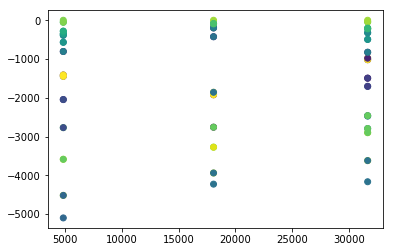

In [65]:
plt.figure()
#plt.pcolormesh(input_x, input_y, input_lith)
plt.scatter(well_x, well_y, c=well_id, cmap='viridis')

<IPython.core.display.Javascript object>


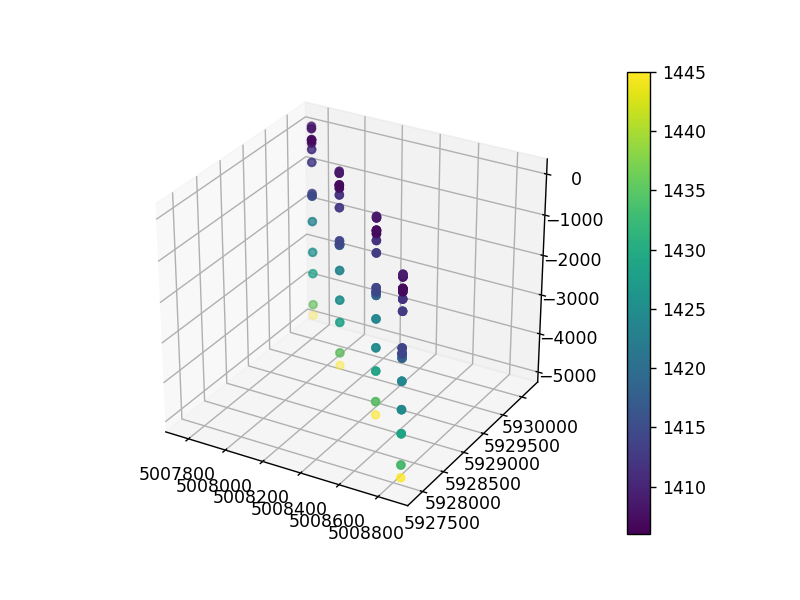

In [6]:
#3D Data?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(well_pos_x, well_pos_y, well_pos_z, c=well_rock, vmin=1406, vmax=1445)
fig.colorbar(p)

In [4]:
#SVM training
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

'''
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel = 'rbf', C=C, gamma=gamma)
        clf.fit(well_pos, well_lith)
        score = clf.score(pos_unknown, subsurface_lith)
        classifiers.append((C, gamma, clf, score))
'''
prediction = clf.predict(pos_unknown)
prediction = prediction.reshape(len(input_x),len(input_y)).T

NameError: name 'X' is not defined

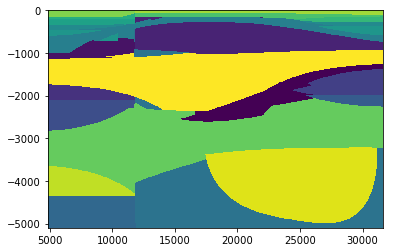

In [215]:
#SVM training
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C=10000.0, gamma=1e-8)
#clf = SVC()
clf.fit(well_pos, well_id)

prediction = clf.predict(pos_unknown)
prediction = prediction.reshape(len(input_x),len(input_y)).T

plt.figure()
plt.pcolormesh(input_x, input_y, prediction, cmap='viridis', vmin=0)

[[  7.   7.   7. ...,   8.   8.   8.]
 [  7.   7.   7. ...,   8.   8.   8.]
 [  7.   7.   7. ...,   8.   8.   8.]
 ..., 
 [ 17.  17.  17. ...,  18.  18.  18.]
 [ 17.  17.  17. ...,  18.  18.  18.]
 [ 17.  17.  17. ...,  18.  18.  18.]]


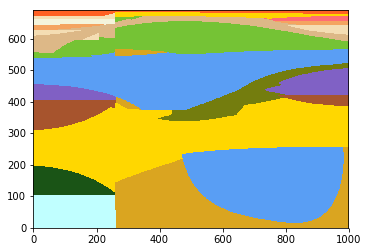

In [217]:
from matplotlib import colors
#meshx, meshy = np.meshgrid(img_x, img_y)
print(prediction)
#for i in range(len(prediction)):
#    for j in range(len(prediction[i])):
        #print(prediction[i][j])
#cmap = colors.ListedColormap(hex_color)#['white', 'red'])

plt.imshow(prediction, origin='lower', cmap=cmap)
#print(color_m)

[[[191, 255, 255] [191, 255, 255] [191, 255, 255] ..., [192, 255, 255]
  [192, 255, 255] [192, 255, 255]]
 [[191, 255, 255] [191, 255, 255] [191, 255, 255] ..., [192, 255, 255]
  [192, 255, 255] [192, 255, 255]]
 [[191, 255, 255] [191, 255, 255] [191, 255, 255] ..., [192, 255, 255]
  [192, 255, 255] [192, 255, 255]]
 ..., 
 [[255, 214, 0] [255, 214, 0] [255, 214, 0] ..., [255, 215, 0]
  [255, 215, 0] [255, 215, 0]]
 [[255, 214, 0] [255, 214, 0] [255, 214, 0] ..., [255, 215, 0]
  [255, 215, 0] [255, 215, 0]]
 [[255, 214, 0] [255, 214, 0] [255, 214, 0] ..., [255, 215, 0]
  [255, 215, 0] [255, 215, 0]]]


TypeError: Image data can not convert to float

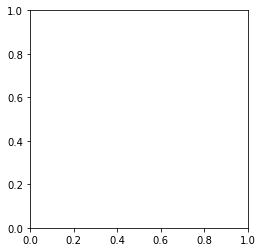

In [195]:
prediction_c = np.array(prediction, dtype=int)
pred_color = np.array(prediction, dtype=object)
pred = []
for i in range(len(prediction_c)):
    #pred.append([])
    for j in range(len(prediction_c[i])):
        #pred[i].append(color[prediction_c[i][j]])
        pred_color[i][j] = list(color_m[prediction_c[i][j]])

print(pred_color)
pred_color = np.array(pred_color)

plt.imshow(pred_color)
#np.shape(pred_color)

TypeError: Image data can not convert to float

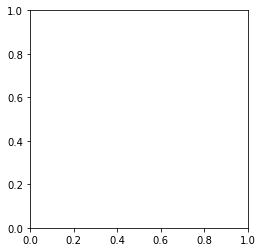

In [191]:
plt.imshow(pred_color)
#pred_color[0][0]

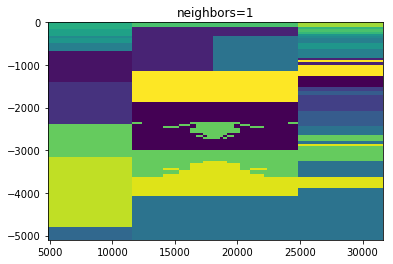

In [94]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(well_pos, well_id)

prediction = neigh.predict(pos_unknown)
prediction = prediction.reshape(len(input_x),len(input_y)).T

plt.pcolormesh(input_x, input_y, prediction, cmap='viridis', vmin=0, vmax=np.max(well_id))
plt.title('neighbors=1')

In [91]:
#Simple kriging
#This requires truncation!

kk = krig_class()
sample_mean = np.mean(well_id)
sample_var = np.var(well_id)
r = 2000
cf_func = cf_gaussian
lags = np.arange(0,100000,100)
tol = 100
sill = 0.7
nugget = 0.0

kk.variogram(well_pos, well_id, r, cf_func, lags, tol, sill, nugget)
zz, krig_var = kriging(pos_unknown, well_pos, well_id, r, sample_mean, sample_var, cf_func, nugget)
        
zz = zz.reshape(len(input_x),len(input_y))
zz = zz.T
zz = np.around(zz)

plt.figure()
plt.pcolormesh(input_x, input_y, zz, cmap='viridis', vmin=0.0, vmax=np.max(well_id))

IndexError: list index out of range

In [213]:
section1=np.load('0_0000_0000_section_id_png.npy')
color_m = np.load('id_c_LOT.npy')

color_m = np.array(color_m, dtype=int)

color_m = np.delete(color_m, 0,1)

print(color_m)

hex_color = []
for i in color_m:
    print(i/255.0)
    hex_color.append((i/255.0))

print(hex_color)

[[116 125  14]
 [117 195  52]
 [117 195  53]
 [128  96 196]
 [128  97 197]
 [167  84  45]
 [167  85  46]
 [191 255 255]
 [192 255 255]
 [218 165  32]
 [221 184 135]
 [244 164  96]
 [244 221 179]
 [244 244 219]
 [245 222 179]
 [245 245 220]
 [255 109 116]
 [255 214   0]
 [255 215   0]
 [255  96  35]
 [255  97  35]
 [ 26  84  22]
 [ 89 158 244]
 [ 90 158 244]]
[ 0.45490196  0.49019608  0.05490196]
[ 0.45882353  0.76470588  0.20392157]
[ 0.45882353  0.76470588  0.20784314]
[ 0.50196078  0.37647059  0.76862745]
[ 0.50196078  0.38039216  0.77254902]
[ 0.65490196  0.32941176  0.17647059]
[ 0.65490196  0.33333333  0.18039216]
[ 0.74901961  1.          1.        ]
[ 0.75294118  1.          1.        ]
[ 0.85490196  0.64705882  0.1254902 ]
[ 0.86666667  0.72156863  0.52941176]
[ 0.95686275  0.64313725  0.37647059]
[ 0.95686275  0.86666667  0.70196078]
[ 0.95686275  0.95686275  0.85882353]
[ 0.96078431  0.87058824  0.70196078]
[ 0.96078431  0.96078431  0.8627451 ]
[ 1.          0.42745098  0.454

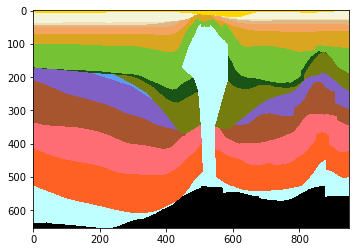

In [166]:
plt.imshow(section1[:,:,0:3])

In [168]:
section1[:,:,0:3]

array([[[  0,   0,   0],
        [255, 214,   0],
        [255, 214,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 214,   0],
        [255, 214,   0],
        ..., 
        [255, 215,   0],
        [245, 245, 220],
        [245, 245, 220]],

       [[  0,   0,   0],
        [255, 214,   0],
        [255, 214,   0],
        ..., 
        [245, 245, 220],
        [245, 245, 220],
        [245, 245, 220]],

       ..., 
       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,